In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

from ctgan import CTGANSynthesizer
from ctgan import load_demo

Iris.csv



In [31]:
iris = pd.read_csv("data/Iris.csv")
iris.drop('Id', axis=1, inplace=True)
iris_columns = iris.columns

In [3]:
iris_ctgan = CTGANSynthesizer(epochs=10)
iris_ctgan.fit(iris, iris_columns)

In [4]:
iris_samples = iris_ctgan.sample(150)

In [5]:
iris_samples.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.9,3.3,5.7,0.2,Iris-virginica
1,6.4,3.4,5.9,1.3,Iris-virginica
2,6.1,2.0,4.7,2.1,Iris-versicolor
3,5.4,2.0,1.6,0.1,Iris-virginica
4,6.3,4.4,1.0,2.0,Iris-versicolor


In [6]:
iris_samples["Species"].value_counts()

Iris-setosa        52
Iris-versicolor    49
Iris-virginica     49
Name: Species, dtype: int64

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


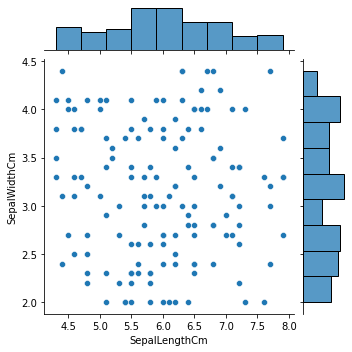

In [7]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_samples, size=5)

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


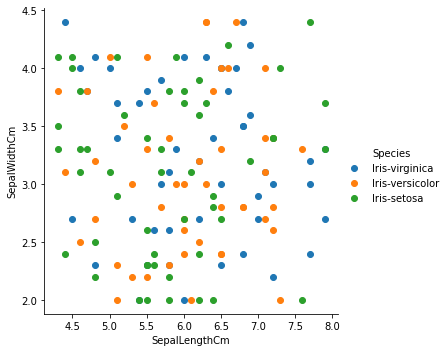

In [8]:
sns.FacetGrid(iris_samples, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

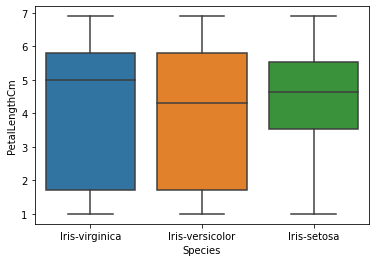

In [9]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_samples)

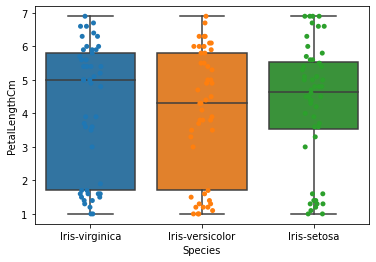

In [10]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris_samples)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris_samples, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

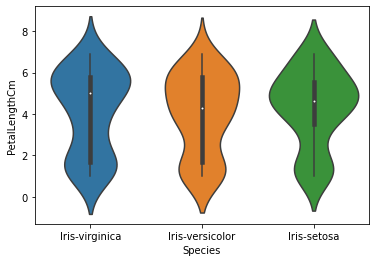

In [11]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_samples, size=6)

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


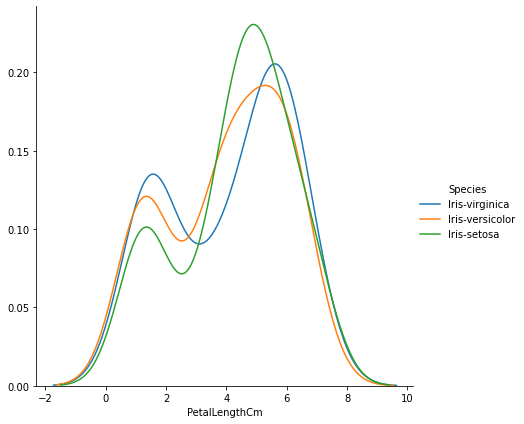

In [12]:
sns.FacetGrid(iris_samples, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


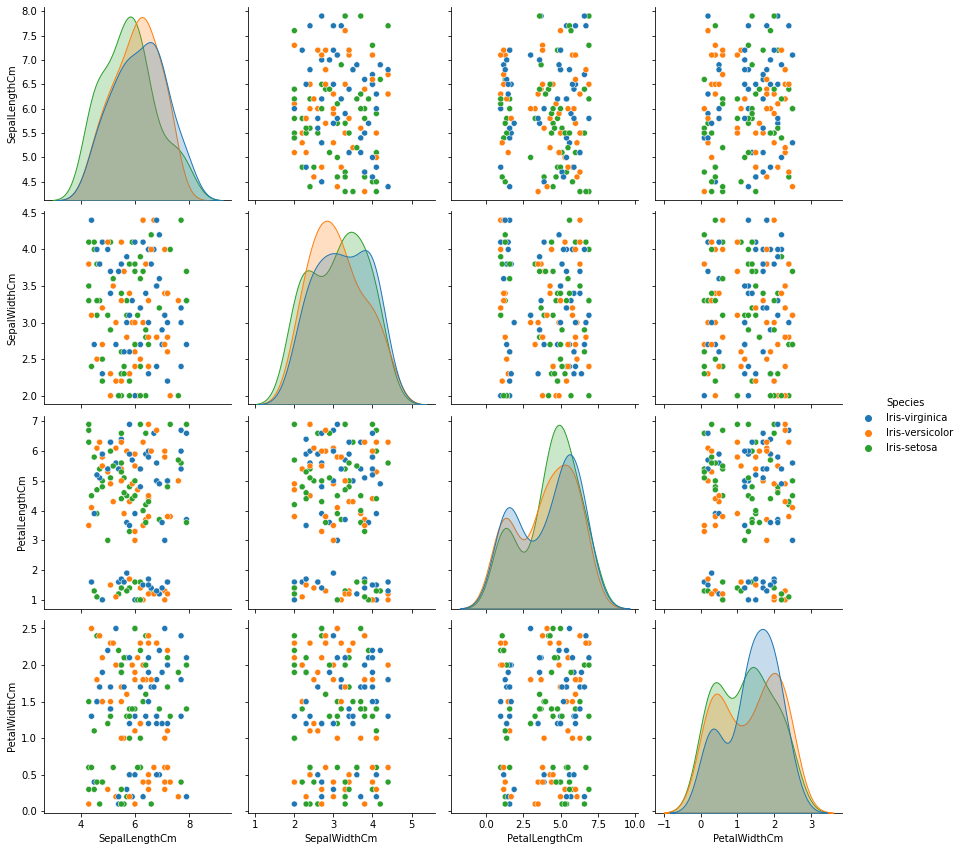

In [13]:
#sns.pairplot(iris_samples.drop("Id", axis=1), hue="Species", size=3)
sns.pairplot(iris_samples,hue="Species", size=3)

/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


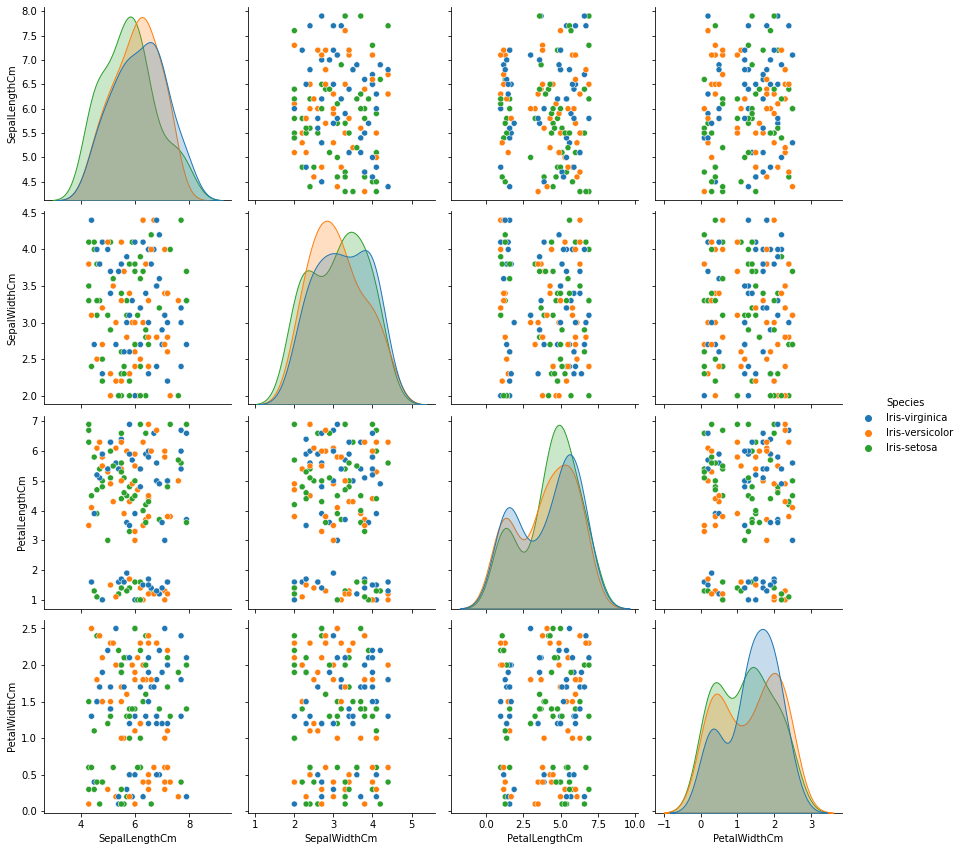

In [14]:
#sns.pairplot(iris_samples.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")
sns.pairplot(iris_samples, hue="Species", size=3, diag_kind="kde")

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

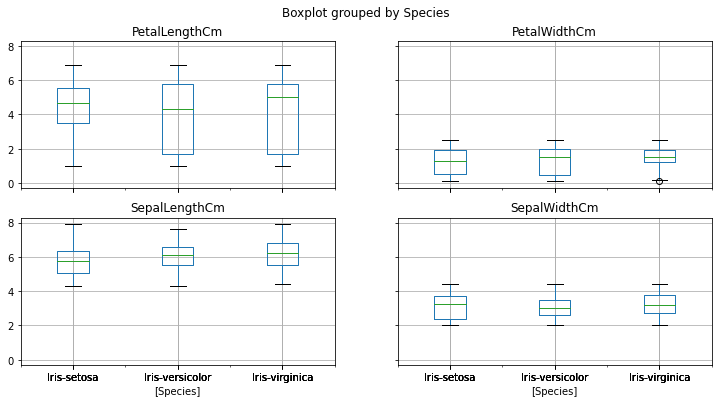

In [15]:
#iris_samples.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))
iris_samples.boxplot(by="Species", figsize=(12, 6))

<AxesSubplot:>

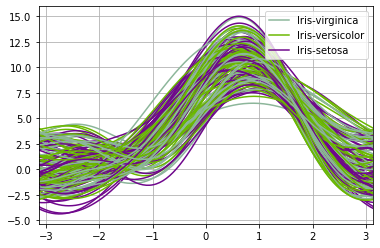

In [16]:
from pandas.plotting import andrews_curves
#andrews_curves(iris_samples.drop("Id", axis=1), "Species")
andrews_curves(iris_samples, "Species")

<AxesSubplot:>

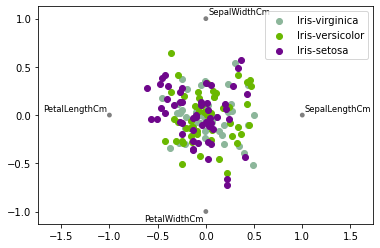

In [17]:
from pandas.plotting import radviz
#radviz(iris_samples.drop("Id", axis=1), "Species")
radviz(iris_samples, "Species")

In [18]:
iris_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/Users/captain/opt/anaconda3/envs/iris-GAN/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


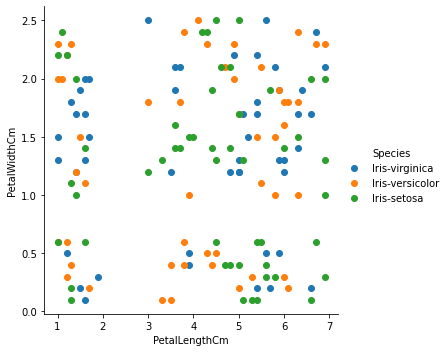

In [19]:
sns.FacetGrid(iris_samples, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

In [20]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [21]:
train, test = train_test_split(iris_samples, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [22]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [23]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,5.5,3.3,5.0,1.7
96,5.5,2.6,6.6,0.1


In [24]:
train_y.head()  ##output of the training data

128    Iris-versicolor
96         Iris-setosa
25     Iris-versicolor
121        Iris-setosa
55     Iris-versicolor
Name: Species, dtype: object

In [25]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.1,4.0,1.0,0.6
20,6.8,2.8,1.3,2.3


In [26]:
#SVM
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.2222222222222222


In [27]:
#Logistic regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.26666666666666666


In [28]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.26666666666666666


In [29]:
#KNN
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.28888888888888886


<ipython-input-30-02967e99a1d2>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


([<matplotlib.axis.XTick at 0x7f8d5e469310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

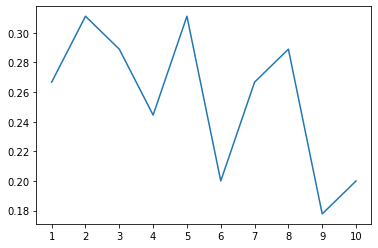

In [30]:
#accuracy for various values of n for K-Nearest nerighbours¶
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)